In [2]:
import pandas as pd

In [3]:
matches = pd.read_csv('matches.csv')
deliveries = pd.read_csv('deliveries.csv')

In [4]:
matches.shape

(756, 18)

In [5]:
deliveries.shape

(179078, 21)

In [6]:
matches.columns.tolist()

['id',
 'season',
 'city',
 'date',
 'team1',
 'team2',
 'toss_winner',
 'toss_decision',
 'result',
 'dl_applied',
 'winner',
 'win_by_runs',
 'win_by_wickets',
 'player_of_match',
 'venue',
 'umpire1',
 'umpire2',
 'umpire3']

In [7]:
deliveries.columns.tolist()

['match_id',
 'inning',
 'batting_team',
 'bowling_team',
 'over',
 'ball',
 'batsman',
 'non_striker',
 'bowler',
 'is_super_over',
 'wide_runs',
 'bye_runs',
 'legbye_runs',
 'noball_runs',
 'penalty_runs',
 'batsman_runs',
 'extra_runs',
 'total_runs',
 'player_dismissed',
 'dismissal_kind',
 'fielder']

In [8]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [9]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [13]:
matches.isnull().sum() #check null values


,0
id,0
season,0
city,7
date,0
team1,0
team2,0
toss_winner,0
toss_decision,0
result,0
dl_applied,0


In [12]:
 matches = matches.drop(columns=['umpire3', 'umpire1', 'umpire2'], errors='ignore')

In [14]:
matches['city'].fillna('Unknown', inplace=True)

/tmp/ipython-input-2503575568.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  matches['city'].fillna('Unknown', inplace=True)


In [15]:
print(matches[matches['winner'].isnull()][['date', 'team1', 'team2', 'result']])

           date                        team1                        team2  \
300  2011-05-21             Delhi Daredevils                Pune Warriors   
545  2015-04-29  Royal Challengers Bangalore             Rajasthan Royals   
570  2015-05-17             Delhi Daredevils  Royal Challengers Bangalore   
744    30/04/19  Royal Challengers Bangalore             Rajasthan Royals   

        result  
300  no result  
545  no result  
570  no result  
744  no result  


In [17]:
matches['date'] = pd.to_datetime(matches['date'], format='mixed', dayfirst=True)

In [18]:
team_name_map = {
    'Delhi Daredevils': 'Delhi Capitals',
    'Deccan Chargers': 'Sunrisers Hyderabad'
}

In [19]:
matches.replace({'team1': team_name_map, 'team2': team_name_map,
                 'winner': team_name_map, 'toss_winner': team_name_map}, inplace=True)

In [20]:
deliveries.isnull().sum()

,0
match_id,0
inning,0
batting_team,0
bowling_team,0
over,0
ball,0
batsman,0
non_striker,0
bowler,0
is_super_over,0


In [21]:
deliveries.replace({'batting_team': team_name_map, 'bowling_team': team_name_map}, inplace=True)

In [23]:
#Batsman Performance Summary
legal_deliveries = deliveries[deliveries['wide_runs'] == 0]

batsman_stats = legal_deliveries.groupby('batsman').agg({
    'batsman_runs': ['sum', 'count'],
    'ball': 'count'
})
batsman_stats.columns = ['total_runs', 'balls_faced', 'total_balls']
batsman_stats['fours'] = legal_deliveries[legal_deliveries['batsman_runs'] == 4].groupby('batsman').size()
batsman_stats['sixes'] = legal_deliveries[legal_deliveries['batsman_runs'] == 6].groupby('batsman').size()
batsman_stats['strike_rate'] = (batsman_stats['total_runs'] / batsman_stats['total_balls']) * 100
batsman_stats.fillna(0, inplace=True)

top_batsmen = batsman_stats[batsman_stats['balls_faced'] > 200].sort_values(by='total_runs', ascending=False).head(10)

In [24]:
top_batsmen

,total_runs,balls_faced,total_balls,fours,sixes,strike_rate
batsman,,,,,,
V Kohli,5426,4114,4114,482.0,191.0,131.891104
SK Raina,5390,3917,3917,495.0,195.0,137.605310
RG Sharma,4902,3744,3744,431.0,194.0,130.929487
DA Warner,4722,3306,3306,459.0,181.0,142.831216
S Dhawan,4605,3671,3671,526.0,96.0,125.442659
CH Gayle,4533,2981,2981,376.0,327.0,152.063066
MS Dhoni,4450,3215,3215,297.0,207.0,138.413686
RV Uthappa,4424,3384,3384,436.0,156.0,130.732861
AB de Villiers,4416,2911,2911,357.0,214.0,151.700447


/tmp/ipython-input-3089245627.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='batsman', y='total_runs', data=top_batsmen, palette='viridis')


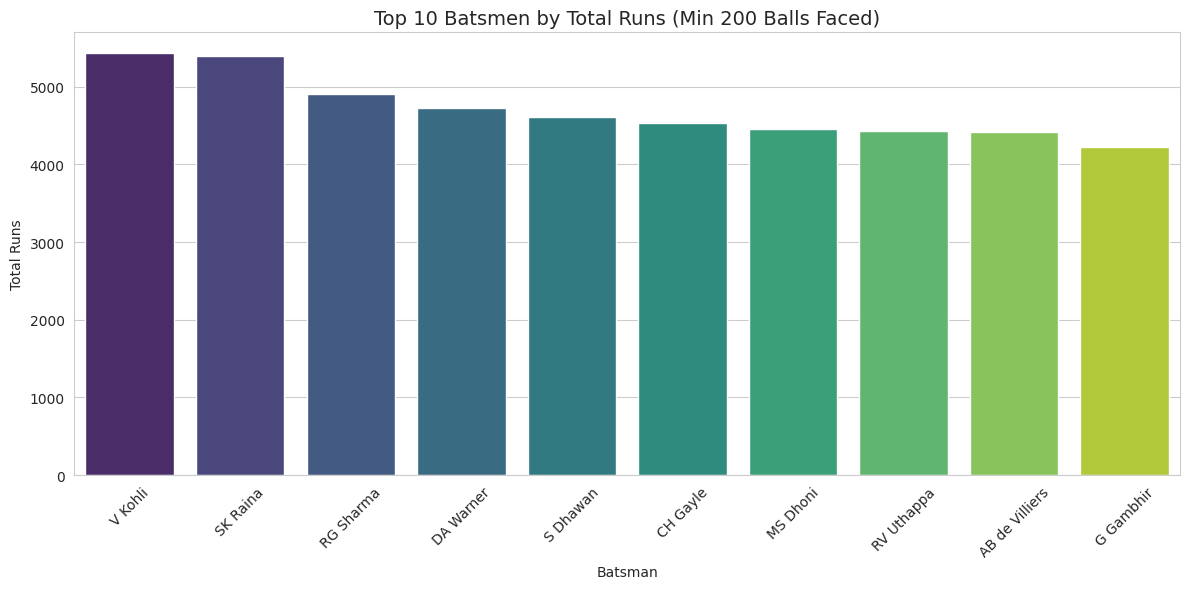

In [25]:
#Plotting the data
import matplotlib.pyplot as plt
import seaborn as sns

top_batsmen = top_batsmen.reset_index()
sns.set_style('whitegrid')
plt.figure(figsize=(12, 6))

sns.barplot(x='batsman', y='total_runs', data=top_batsmen, palette='viridis')
plt.title('Top 10 Batsmen by Total Runs (Min 200 Balls Faced)', fontsize=14)
plt.xlabel('Batsman')
plt.ylabel('Total Runs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



/tmp/ipython-input-3446143629.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='batsman', y='strike_rate', data=top_batsmen, palette='coolwarm')


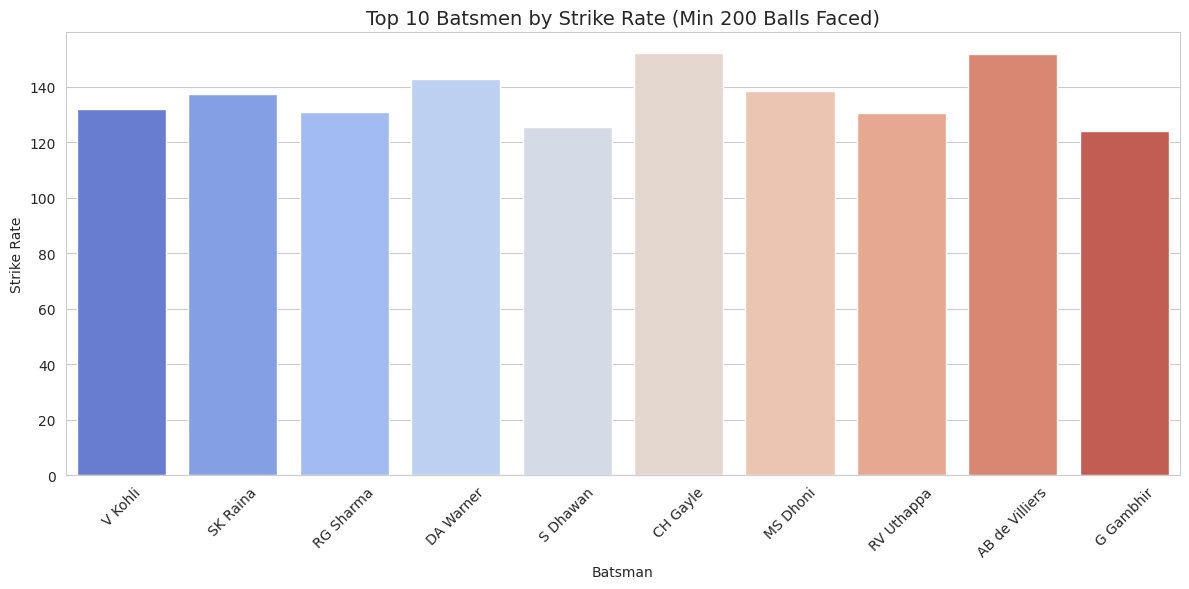

In [26]:
#Plot strike rate
plt.figure(figsize=(12, 6))
sns.barplot(x='batsman', y='strike_rate', data=top_batsmen, palette='coolwarm')
plt.title('Top 10 Batsmen by Strike Rate (Min 200 Balls Faced)', fontsize=14)
plt.xlabel('Batsman')
plt.ylabel('Strike Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<Figure size 1200x600 with 0 Axes>

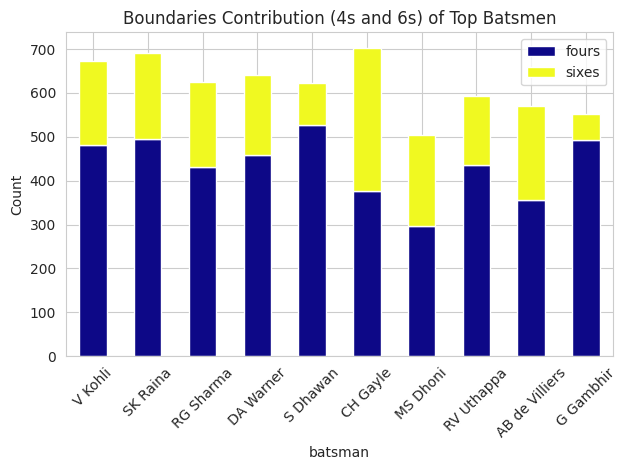

In [27]:
plt.figure(figsize=(12, 6))
top_batsmen.set_index('batsman')[['fours', 'sixes']].plot(kind='bar', stacked=True, colormap='plasma')
plt.title('Boundaries Contribution (4s and 6s) of Top Batsmen')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [28]:
#Bowler performance
legal_deliveries = deliveries[deliveries['wide_runs'] == 0]

wicket_kinds = ['bowled', 'caught', 'lbw', 'stumped', 'caught and bowled', 'hit wicket']
wickets = legal_deliveries[legal_deliveries['dismissal_kind'].isin(wicket_kinds)]

bowler_stats = legal_deliveries.groupby('bowler').agg({
    'total_runs': 'sum',
    'ball': 'count'
})

bowler_stats['wickets'] = wickets.groupby('bowler').size()
bowler_stats['overs'] = bowler_stats['ball'] // 6 + (bowler_stats['ball'] % 6) / 6
bowler_stats['ec nomy'] = bowler_stats['total_runs'] / bowler_stats['overs']

bowler_stats['bowling_avg'] = bowler_stats['total_runs'] / bowler_stats['wickets']
bowler_stats = bowler_stats[bowler_stats['ball'] > 300]  # Min overs filter
bowler_stats.fillna(0, inplace=True)

top_bowlers = bowler_stats.sort_values(by='wickets', ascending=False).head(10)
top_bowlers.reset_index(inplace=True)



In [29]:
top_bowlers

,bowler,total_runs,ball,wickets,overs,economy,bowling_avg
0,SL Malinga,3345,2845,170.0,474.166667,7.054482,19.676471
1,A Mishra,3786,3122,156.0,520.333333,7.276105,24.269231
2,PP Chawla,4089,3126,149.0,521.000000,7.848369,27.442953
3,DJ Bravo,3578,2592,147.0,432.000000,8.282407,24.340136
4,Harbhajan Singh,3945,3377,146.0,562.833333,7.009180,27.020548
5,B Kumar,3134,2620,133.0,436.666667,7.177099,23.563910
6,SP Narine,2866,2565,122.0,427.500000,6.704094,23.491803
7,R Ashwin,3257,2927,122.0,487.833333,6.676461,26.696721
8,UT Yadav,3510,2507,119.0,417.833333,8.400479,29.495798
9,RA Jadeja,3154,2500,107.0,416.666667,7.569600,29.476636


/tmp/ipython-input-3737447987.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='bowler', y='wickets', data=top_bowlers, palette='crest')


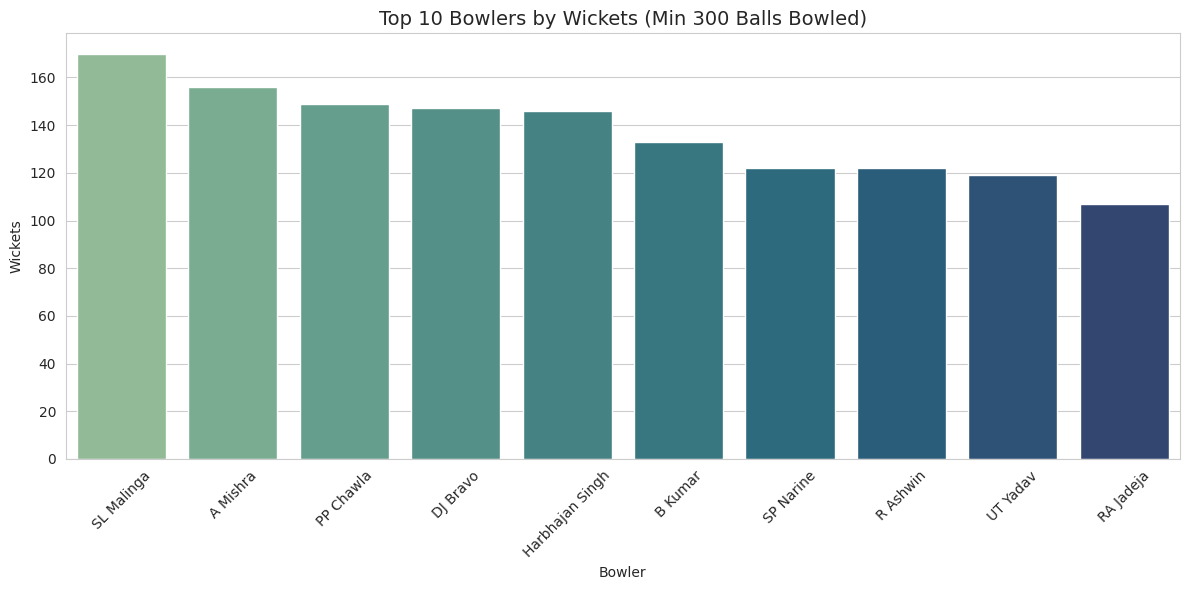

In [30]:
plt.figure(figsize=(12, 6))
sns.barplot(x='bowler', y='wickets', data=top_bowlers, palette='crest')
plt.title('Top 10 Bowlers by Wickets (Min 300 Balls Bowled)', fontsize=14)
plt.xlabel('Bowler')
plt.ylabel('Wickets')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/tmp/ipython-input-2916816043.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='bowler', y='economy', data=top_bowlers, palette='coolwarm')


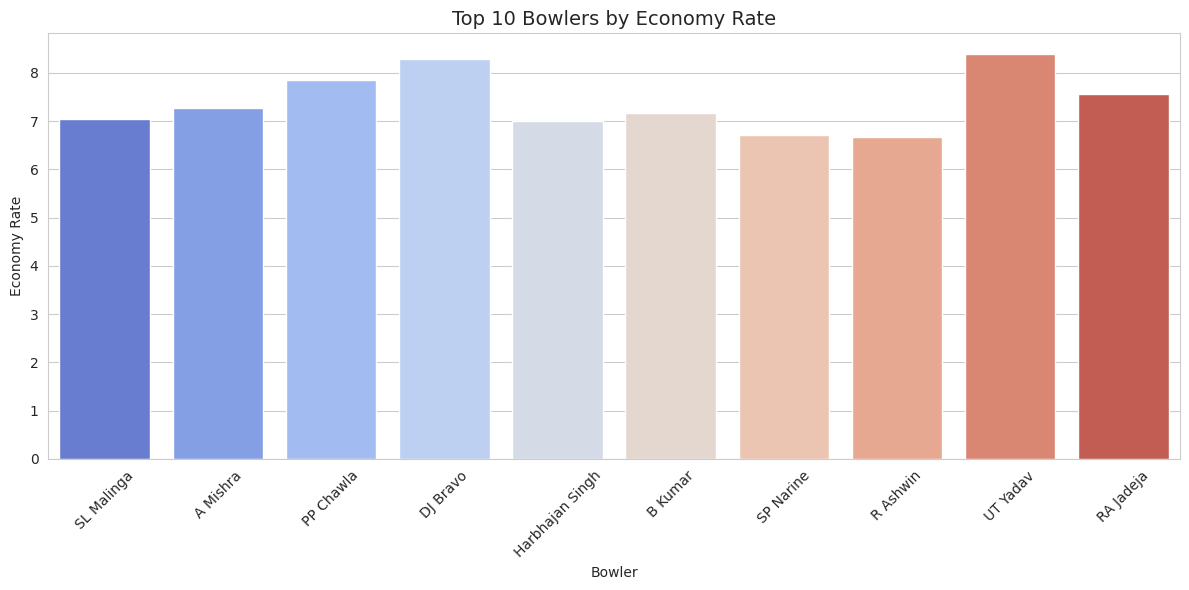

In [31]:
plt.figure(figsize=(12, 6))
sns.barplot(x='bowler', y='economy', data=top_bowlers, palette='coolwarm')
plt.title('Top 10 Bowlers by Economy Rate', fontsize=14)
plt.xlabel('Bowler')
plt.ylabel('Economy Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [32]:
#Phase wise analysis
def assign_phase(over):
    if over <= 6:
        return 'Powerplay'
    elif over <= 15:
        return 'Middle'
    else:
        return 'Death'

deliveries['phase'] = deliveries['over'].apply(assign_phase)


In [33]:
#phase wise batsmen_performance
phase_bat = deliveries[deliveries['wide_runs'] == 0].groupby(['batsman', 'phase']).agg({
    'batsman_runs': ['sum', 'count']
})
phase_bat.columns = ['runs', 'balls']
phase_bat = phase_bat.reset_index()

phase_bat['strike_rate'] = (phase_bat['runs'] / phase_bat['balls']) * 100
death_bat = phase_bat[(phase_bat['phase'] == 'Death') & (phase_bat['balls'] > 60)]
death_bat = death_bat.sort_values(by='strike_rate', ascending=False).head(10)

In [34]:
death_bat

,batsman,phase,runs,balls,strike_rate
830,RR Pant,Death,478,207,230.917874
55,AB de Villiers,Death,1408,629,223.847377
202,CH Gayle,Death,489,228,214.473684
76,AD Russell,Death,828,395,209.620253
226,CR Brathwaite,Death,158,79,200.000000
681,N Rana,Death,186,94,197.872340
1073,V Kohli,Death,1154,600,192.333333
604,MEK Hussey,Death,261,136,191.911765
994,SV Samson,Death,408,214,190.654206
244,DA Warner,Death,512,269,190.334572


/tmp/ipython-input-2982709679.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='batsman', y='strike_rate', data=death_bat, palette='magma')


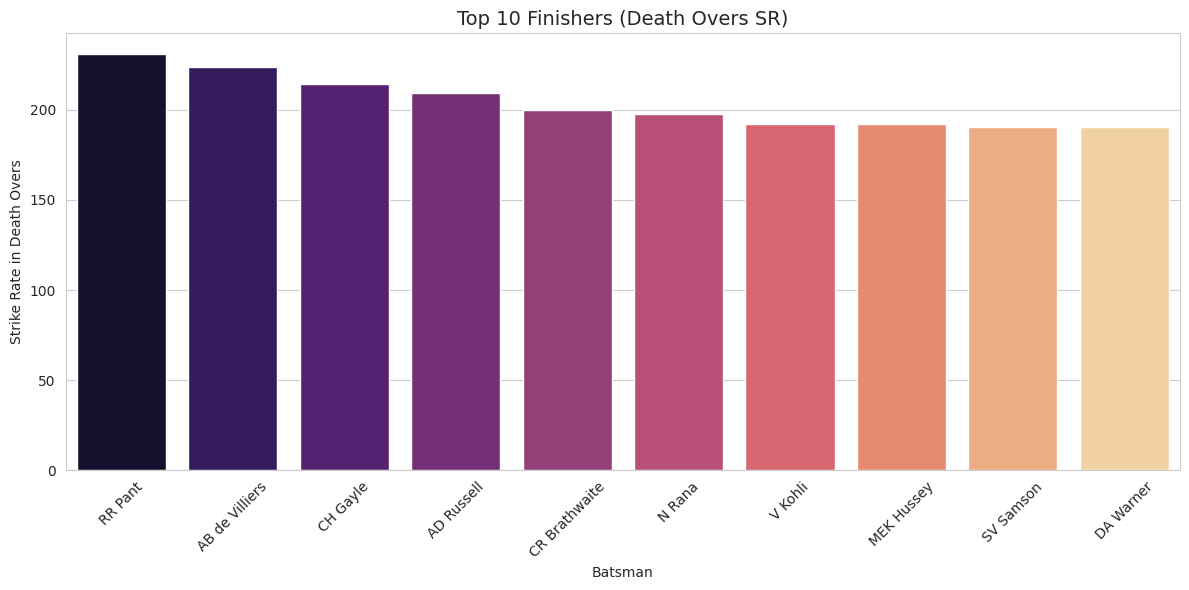

In [35]:
plt.figure(figsize=(12, 6))
sns.barplot(x='batsman', y='strike_rate', data=death_bat, palette='magma')
plt.title('Top 10 Finishers (Death Overs SR)', fontsize=14)
plt.xlabel('Batsman')
plt.ylabel('Strike Rate in Death Overs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [36]:
#phase wise bowler performance
legal = deliveries[deliveries['wide_runs'] == 0]

phase_bowl = legal.groupby(['bowler', 'phase']).agg({
    'total_runs': 'sum',
    'ball': 'count'
})

phase_bowl.columns = ['runs_conceded', 'balls_bowled']
phase_bowl = phase_bowl.reset_index()
phase_bowl['overs'] = phase_bowl['balls_bowled'] // 6 + (phase_bowl['balls_bowled'] % 6) / 6
phase_bowl['economy'] = phase_bowl['runs_conceded'] / phase_bowl['overs']

death_bowl = phase_bowl[(phase_bowl['phase'] == 'Death') & (phase_bowl['balls_bowled'] > 50)]
death_bowl = death_bowl.sort_values(by='economy').head(10)

In [37]:
death_bowl

,bowler,phase,runs_conceded,balls_bowled,overs,economy
514,L Ngidi,Death,66,60,10.000000,6.600000
956,Sohail Tanvir,Death,119,104,17.333333,6.865385
467,KH Pandya,Death,111,92,15.333333,7.239130
844,S Sharma,Death,93,76,12.666667,7.342105
243,DE Bollinger,Death,291,236,39.333333,7.398305
713,R Ashwin,Death,548,441,73.500000,7.455782
913,SP Narine,Death,996,795,132.500000,7.516981
17,A Kumble,Death,213,170,28.333333,7.517647
1028,VY Mahesh,Death,81,64,10.666667,7.593750
572,MA Starc,Death,258,203,33.833333,7.625616


/tmp/ipython-input-666799445.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='bowler', y='economy', data=death_bowl, palette='viridis')


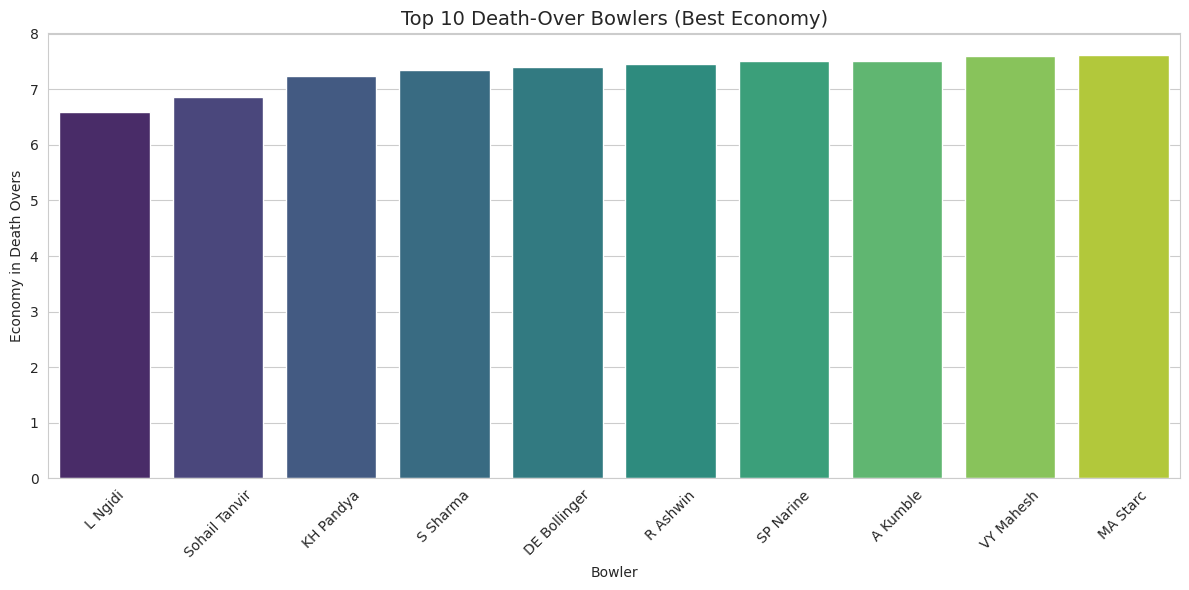

In [38]:
plt.figure(figsize=(12, 6))
sns.barplot(x='bowler', y='economy', data=death_bowl, palette='viridis')
plt.title('Top 10 Death-Over Bowlers (Best Economy)', fontsize=14)
plt.xlabel('Bowler')
plt.ylabel('Economy in Death Overs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
